In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# importing dataset
temp_by_country = pd.read_csv('GlobalLandTemperaturesByCountry.csv')
temp_by_country.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [ ]:
temp_by_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


In [ ]:
temp_by_country.isnull().sum()
temp_by_country = temp_by_country.dropna(how='any' ,axis=0)
temp_by_country.shape

(544811, 4)

In [ ]:
temp_by_country['dt'][0].split('-')[0]
def fetch_year(date):
    return date.split('-')[0]
temp_by_country['years']=temp_by_country['dt'].apply(fetch_year)
temp_by_country.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,years
0,1743-11-01,4.384,2.294,Åland,1743
5,1744-04-01,1.530,4.680,Åland,1744
6,1744-05-01,6.702,1.789,Åland,1744
7,1744-06-01,11.609,1.577,Åland,1744
8,1744-07-01,15.342,1.410,Åland,1744


In [ ]:
by_country=temp_by_country[['Country','AverageTemperature']].groupby(['Country']).mean().sort_values('AverageTemperature')
byx=pd.concat([by_country[20:23],by_country[72:75]],axis=0)
byx

,AverageTemperature
Country,
Åland,5.291383
Latvia,5.320545
Belarus,5.819288
Albania,12.610646
Italy,12.737122
France,12.772446


### Analysing Tunisia Climate Change

In [ ]:
temp_Tunisia=temp_by_country.loc[(temp_by_country.Country == 'Tunisia')]
temp_Tunisia['dt'] = pd.to_datetime(temp_Tunisia['dt'])
temp_Tunisia.set_index('dt',inplace = True)
temp_Tunisia['AverageTemperature'].mean()

19.97059047314578

In [ ]:
# Lưu dataframe temp_Tunisia vào file csv
temp_Tunisia.to_csv('temp_Tunisia.csv')

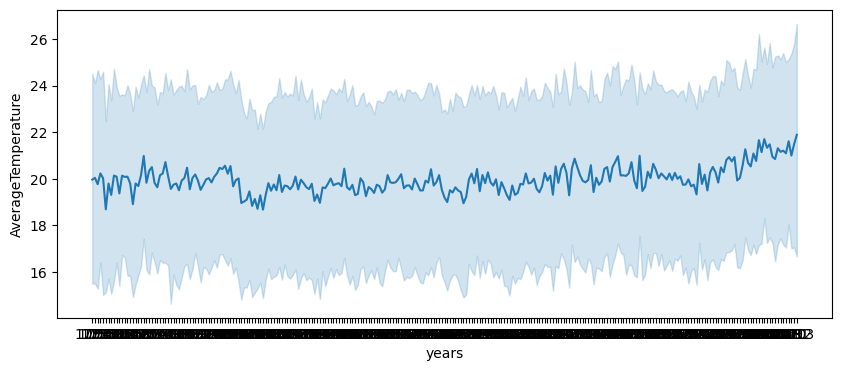

In [ ]:
plt.figure(figsize=(10,4))
sns.lineplot(x = "years" , y = "AverageTemperature",data=temp_Tunisia)
plt.show()

In [ ]:
temp_Tunisia['month']=temp_Tunisia.index.month
temp_Tunisia


,AverageTemperature,AverageTemperatureUncertainty,Country,years,month
dt,,,,,
1753-01-01,8.754,5.363,Tunisia,1753,1
1753-02-01,10.597,3.183,Tunisia,1753,2
1753-03-01,16.105,2.805,Tunisia,1753,3
1753-04-01,18.181,5.257,Tunisia,1753,4
1753-05-01,23.571,2.230,Tunisia,1753,5
...,...,...,...,...,...
2013-04-01,20.383,0.746,Tunisia,2013,4
2013-05-01,24.268,0.336,Tunisia,2013,5
2013-06-01,27.488,0.947,Tunisia,2013,6


In [ ]:
def get_season(month):
    if month>=3 and month<=5:
        return 'spring'
    elif month>=6 and month<=8:
        return 'summer'
    elif month>=9 and month<=11:
        return 'autumn'
    else:
        return 'winter'

temp_Tunisia['season']=temp_Tunisia['month'].apply(get_season)
years=temp_Tunisia['years'].unique()
temp_Tunisia.head()

,AverageTemperature,AverageTemperatureUncertainty,Country,years,month,season
dt,,,,,,
1753-01-01,8.754,5.363,Tunisia,1753,1,winter
1753-02-01,10.597,3.183,Tunisia,1753,2,winter
1753-03-01,16.105,2.805,Tunisia,1753,3,spring
1753-04-01,18.181,5.257,Tunisia,1753,4,spring
1753-05-01,23.571,2.230,Tunisia,1753,5,spring


In [ ]:
spring_temp = []
summer_temp = []
autumn_temp = []
winter_temp = []
for year in years:
    current_df=temp_Tunisia[temp_Tunisia['years'] == year]
    spring_temp.append(current_df[current_df['season'] == 'spring']['AverageTemperature'].mean())
    summer_temp.append(current_df[current_df['season'] == 'summer']['AverageTemperature'].mean())
    autumn_temp.append(current_df[current_df['season'] == 'autumn']['AverageTemperature'].mean())
    winter_temp.append(current_df[current_df['season'] == 'winter']['AverageTemperature'].mean())

Text(0, 0.5, 'Nhiệt Độ')

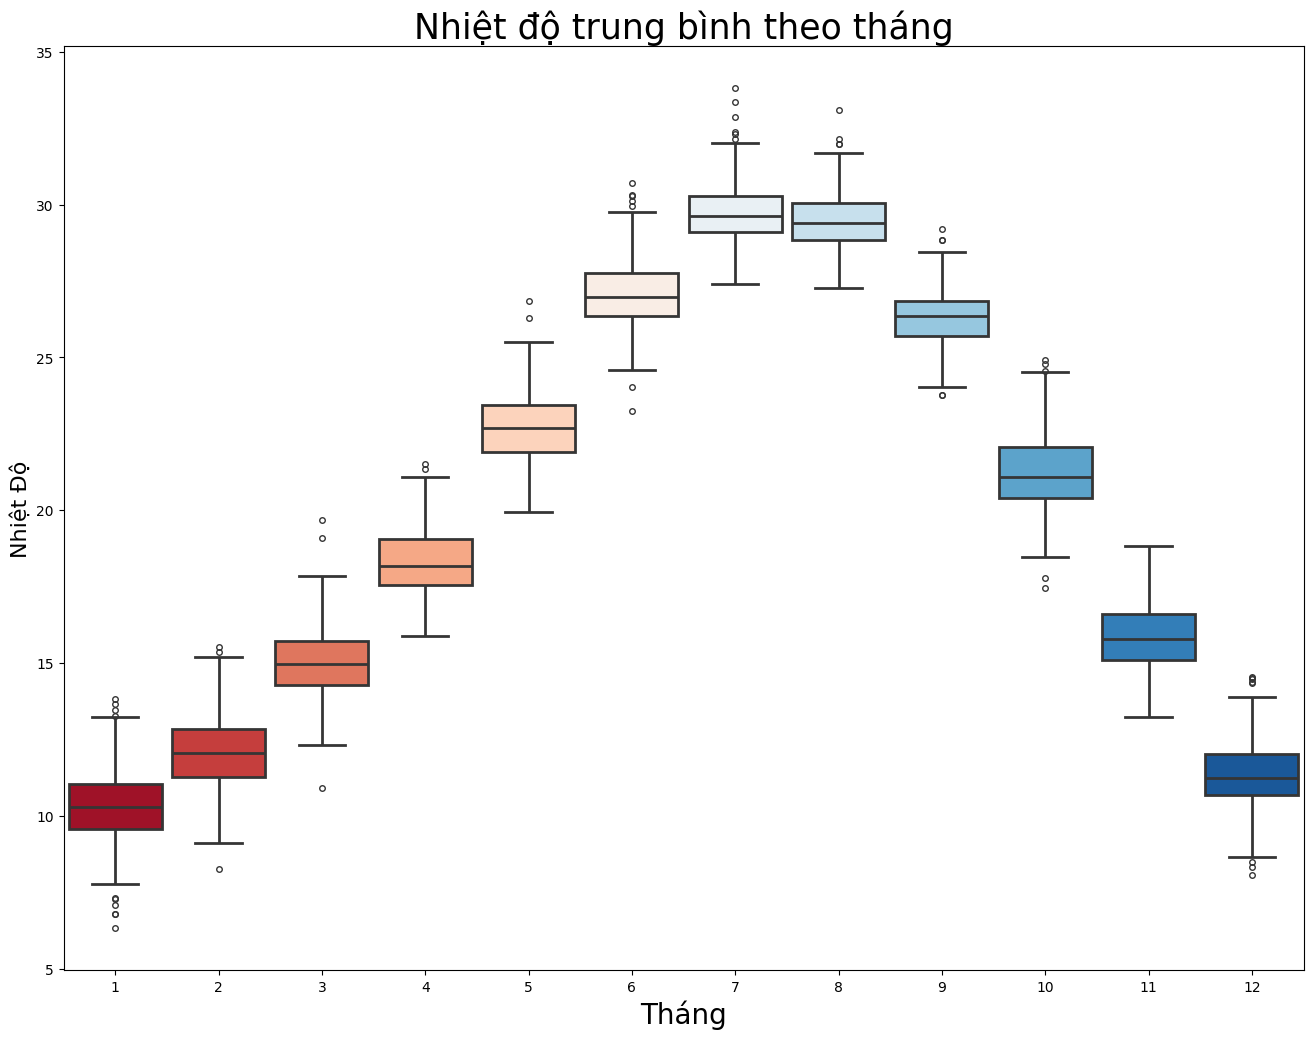

In [ ]:
GlobalTemp=temp_Tunisia
GlobalTemp.loc[GlobalTemp['month']=='1','month'] = 'January'
GlobalTemp.loc[GlobalTemp['month']=='2','month'] = 'February'
GlobalTemp.loc[GlobalTemp['month']=='3','month'] = 'March'
GlobalTemp.loc[GlobalTemp['month']=='4','month'] = 'April'
GlobalTemp.loc[GlobalTemp['month']=='5','month'] = 'May'
GlobalTemp.loc[GlobalTemp['month']=='6','month'] = 'June'
GlobalTemp.loc[GlobalTemp['month']=='7','month'] = 'July'
GlobalTemp.loc[GlobalTemp['month']=='8','month'] = 'August'
GlobalTemp.loc[GlobalTemp['month']=='9','month'] = 'September'
GlobalTemp.loc[GlobalTemp['month']=='10','month'] = 'October'
GlobalTemp.loc[GlobalTemp['month']=='11','month'] = 'November'
GlobalTemp.loc[GlobalTemp['month']=='12','month'] = 'December'
year_month = GlobalTemp.groupby(by = ['years','month']).mean().reset_index()
# Figure size
plt.figure(figsize=(16,12))

# The plot
sns.boxplot(x = 'month', y = 'AverageTemperature', data = year_month, palette = "RdBu", saturation = 1, width = 0.9, fliersize=4, linewidth=2)

# Make pretty
plt.title('Nhiệt độ trung bình theo tháng', fontsize = 25)
plt.xlabel('Tháng', fontsize = 20)
plt.ylabel('Nhiệt Độ', fontsize = 16)

In [ ]:
year_season = GlobalTemp.groupby(by = ['years','season']).mean().reset_index()
winter = year_season.loc[year_season['season'] == 'winter',:]
spring = year_season.loc[year_season['season'] == 'spring',:]
summer = year_season.loc[year_season['season'] == 'summer',:]
autumn = year_season.loc[year_season['season'] == 'autumn',:]

In [ ]:
import plotly.graph_objects as go
fig2 = go.Figure()
for template in ["plotly_white"]:
    fig2.add_trace(go.Scatter(x=winter['years'], y=winter['AverageTemperature'],
                    mode='lines',
                    name='winter',
                    marker_color='#838B8B'))
    fig2.add_trace(go.Scatter(x=spring['years'], y=spring['AverageTemperature'],
                    mode='lines',
                    name='spring',
                    marker_color='#FFB5C5'))
    fig2.add_trace(go.Scatter(x=summer['years'], y=summer['AverageTemperature'],
                    mode='lines',
                    name='summer',
                    marker_color='#87CEFF'))
    fig2.add_trace(go.Scatter(x=autumn['years'], y=autumn['AverageTemperature'],
                    mode='lines',
                    name='autumn',
                    marker_color='#FF8000'))
    fig2.update_layout(
    height=800,
    xaxis_title="Năm",
    yaxis_title='Độ *C',
    title_text='Nhiệt độ trung bình theo mùa trong các năm',
    template=template)




fig2.show()

<AxesSubplot: xlabel='dt', ylabel='AverageTemperature'>

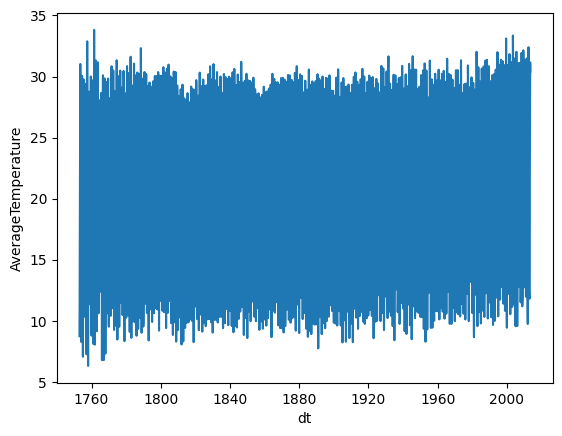

In [ ]:
sns.lineplot(x=temp_Tunisia.index,y=temp_Tunisia['AverageTemperature'])


In [ ]:
pivot = temp_Tunisia.pivot_table(values='AverageTemperature',index='month',columns='years')


Text(0.5, 80.7222222222222, 'Year')

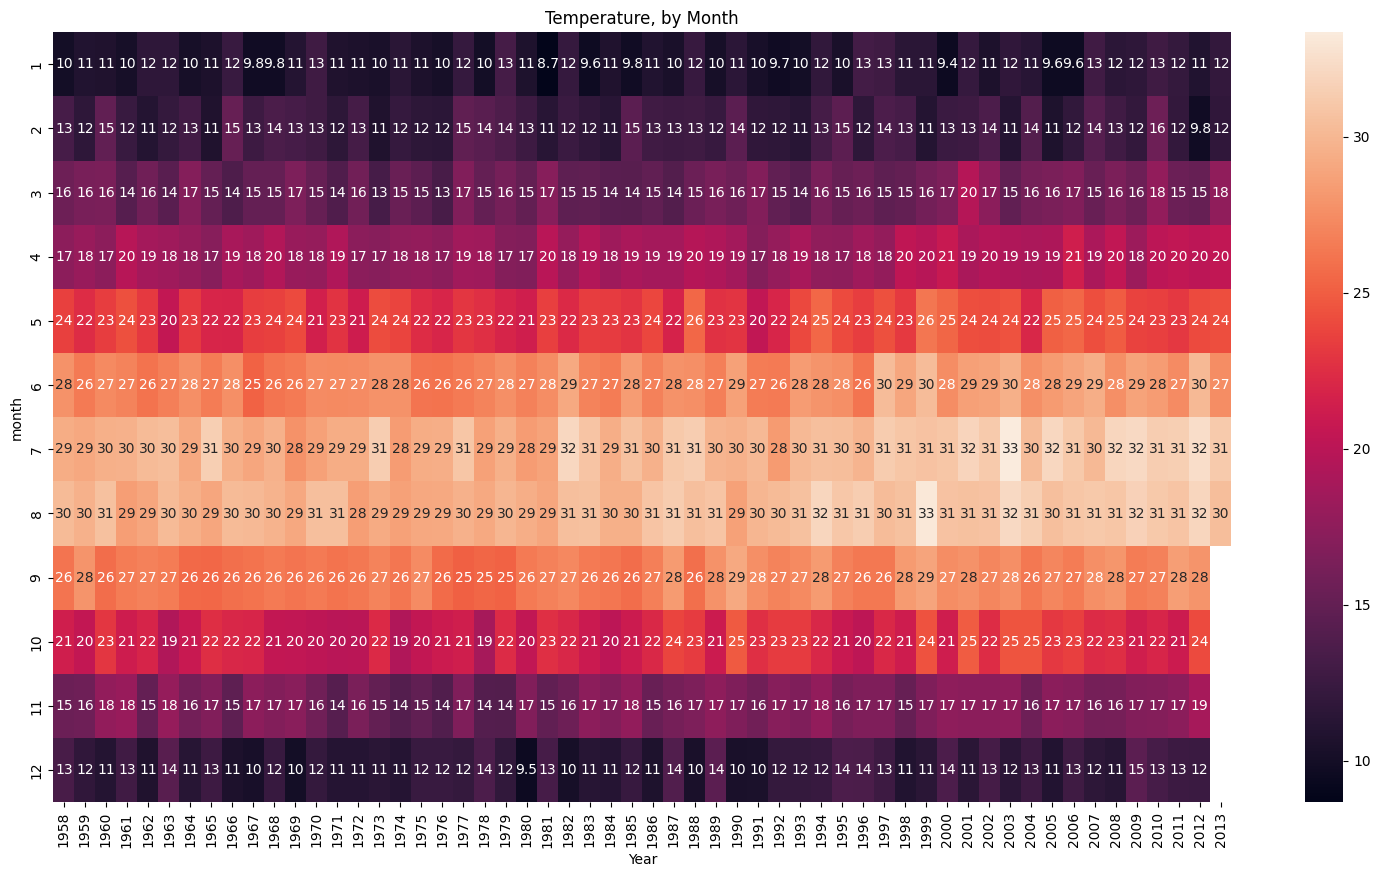

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(19,10))

# Add title
plt.title("Temperature, by Month")

# Heatmap showing average arrival delay for each airline by month
sns.heatmap(data=pivot.loc[:,years[205:]], annot=True)

# Add label for horizontal axis
plt.xlabel("Year")

In [ ]:
temp_Tunisia
# Lưu vào file mới
# temp_Tunisia.to_csv('temp_Tunisia_new.csv')

,AverageTemperature,AverageTemperatureUncertainty,Country,years,month,season
dt,,,,,,
1753-01-01,8.754,5.363,Tunisia,1753,1,winter
1753-02-01,10.597,3.183,Tunisia,1753,2,winter
1753-03-01,16.105,2.805,Tunisia,1753,3,spring
1753-04-01,18.181,5.257,Tunisia,1753,4,spring
1753-05-01,23.571,2.230,Tunisia,1753,5,spring
...,...,...,...,...,...,...
2013-04-01,20.383,0.746,Tunisia,2013,4,spring
2013-05-01,24.268,0.336,Tunisia,2013,5,spring
2013-06-01,27.488,0.947,Tunisia,2013,6,summer


### TRAINING MODEL

In [ ]:
df = pd.read_csv('temp_Tunisia_new.csv')
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,years,month,season
0,1753-01-01,8.754,5.363,Tunisia,1753,1,winter
1,1753-02-01,10.597,3.183,Tunisia,1753,2,winter
2,1753-03-01,16.105,2.805,Tunisia,1753,3,spring
3,1753-04-01,18.181,5.257,Tunisia,1753,4,spring
4,1753-05-01,23.571,2.230,Tunisia,1753,5,spring


In [ ]:
# Split the data into training and test sets
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

### FACTORIAL HMM

In [1]:
pip install hmmlearn

In [19]:
import pandas as pd
import numpy as np
from hmmlearn import hmm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file hoặc từ DataFrame
data = pd.read_csv('temp_Tunisia_new.csv', parse_dates=['dt'])
data = data[['AverageTemperature', 'years']]

# Chuyển dữ liệu thành ma trận numpy
observations = data[['AverageTemperature']].values

# Normalize the data
scaler = StandardScaler()
observations_scaled = scaler.fit_transform(observations)

# Lấy chiều dài của từng chuỗi (theo năm)
years = data['years'].unique()
lengths = data.groupby('years').size().values

# Số lượng trạng thái và biến quan sát
num_factors = 2  # số lượng HMM con
num_states_per_factor = 4  # số lượng trạng thái mỗi HMM con
num_obs = 1  # chỉ sử dụng một biến quan sát

# Khởi tạo các HMM con
models = [hmm.GaussianHMM(n_components=num_states_per_factor, covariance_type='diag', n_iter=100) for _ in range(num_factors)]

# Huấn luyện từng HMM con với cùng một dữ liệu đã chuẩn hóa
for model in models:
    model.fit(observations_scaled, lengths)

print("All individual HMMs trained")

class FactorialHMM:
    def __init__(self, models):
        self.models = models
        self.num_factors = len(models)
        self.num_states = np.prod([model.n_components for model in models])
        self.num_obs = models[0].means_.shape[1]

    def sample(self, n_samples):
        factor_samples = [model.sample(n_samples)[0] for model in self.models]
        combined_samples = np.sum(factor_samples, axis=0)
        factor_states = [model.sample(n_samples)[1] for model in self.models]
        combined_states = np.stack(factor_states, axis=1)
        return combined_samples, combined_states

    def predict(self, observations):
        factor_states = [model.predict(observations) for model in self.models]
        combined_states = np.stack(factor_states, axis=1)
        return combined_states

# Khởi tạo FHMM với các HMM con đã huấn luyện
fhmm = FactorialHMM(models)

# Dự đoán chuỗi trạng thái
state_sequence = fhmm.predict(observations_scaled)

# Tạo các quan sát mới dựa trên mô hình đã học
new_obs_scaled, new_state_sequence = fhmm.sample(len(observations_scaled))

# Đoạn code sau tính toán MAE và RMSE giữa dữ liệu gốc và dữ liệu dự đoán
observed_values = observations_scaled.flatten()
predicted_values = new_obs_scaled.flatten()
mae = mean_absolute_error(observed_values, predicted_values)
rmse = mean_squared_error(observed_values, predicted_values, squared=False)

print(f"Mean Absolute Error (MAE) after scaling: {mae}")
print(f"Root Mean Squared Error (RMSE) after scaling: {rmse}")

# In ra các giá trị mới dự đoán
print("New observations (scaled):", new_obs_scaled)
print("New state sequence:", new_state_sequence)


All individual HMMs trained
Mean Absolute Error (MAE) after scaling: 1.405611154212857
Root Mean Squared Error (RMSE) after scaling: 1.7333054522733626
New observations (scaled): [[-1.19006629]
 [-0.45553641]
 [ 3.63549185]
 ...
 [-0.20691417]
 [ 0.05815818]
 [ 0.67927008]]
New state sequence: [[2 3]
 [0 3]
 [2 1]
 ...
 [2 0]
 [0 1]
 [2 0]]


In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

observed_values = observations_scaled.flatten()
predicted_values = new_obs_scaled.flatten()
mae = mean_absolute_error(observed_values, predicted_values)
rmse = mean_squared_error(observed_values, predicted_values, squared=False)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 1.405611154212857
Root Mean Squared Error (RMSE): 1.7333054522733626


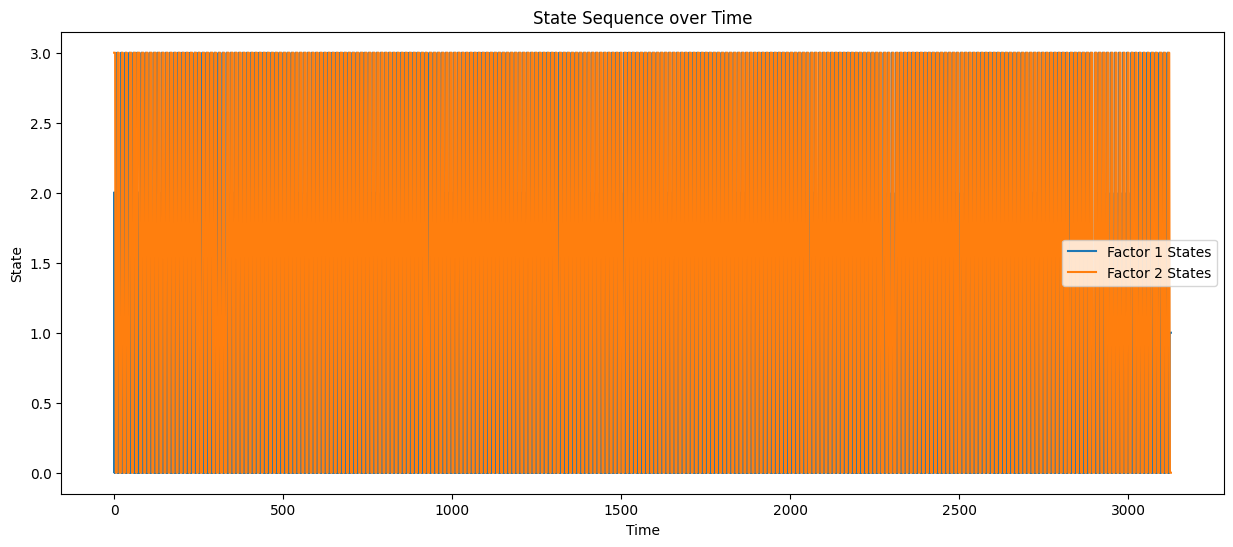

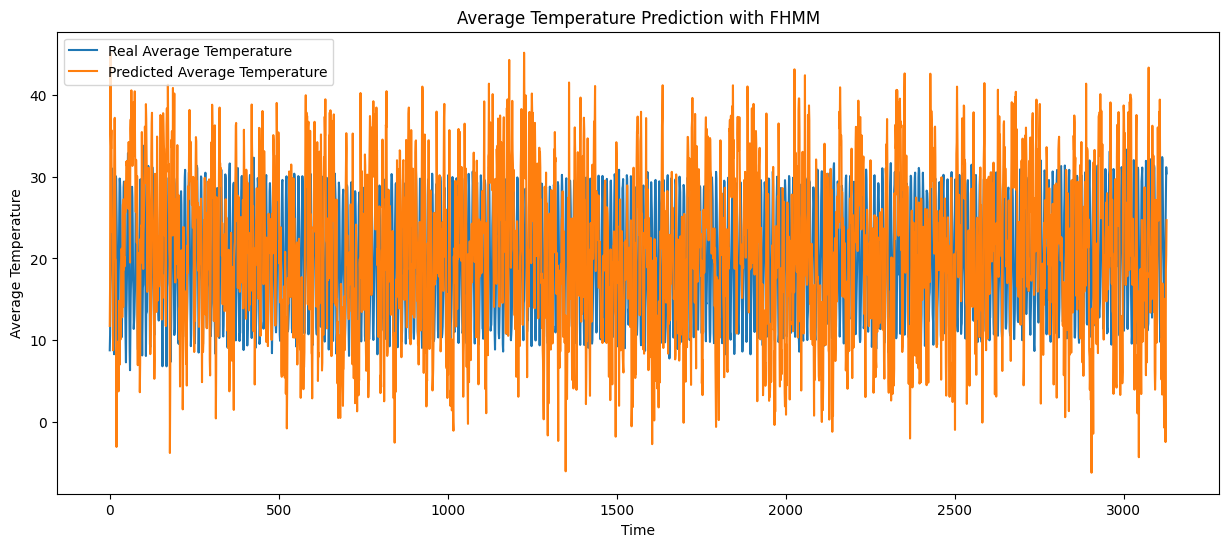

In [21]:
# Vẽ biểu đồ chuỗi trạng thái
plt.figure(figsize=(15, 6))
plt.plot(state_sequence[:, 0], label='Factor 1 States')
plt.plot(state_sequence[:, 1], label='Factor 2 States')
plt.title('State Sequence over Time')
plt.xlabel('Time')
plt.ylabel('State')
plt.legend()
plt.show()

# Chuyển đổi dữ liệu dự đoán từ dạng đã chuẩn hóa về dạng ban đầu
new_obs = scaler.inverse_transform(new_obs_scaled.reshape(-1, 1)).flatten()

# Vẽ biểu đồ so sánh
plt.figure(figsize=(15, 6))
plt.plot(observations, label='Real Average Temperature')
plt.plot(new_obs, label='Predicted Average Temperature')
plt.title('Average Temperature Prediction with FHMM')
plt.xlabel('Time')
plt.ylabel('Average Temperature')
plt.legend()
plt.show()

In [23]:
# Calculate log likelihood
log_likelihood = model.score(observations_scaled)

# Calculate AIC and BIC
n_parameters = 4 * 3  # 4 components with means, variances, and transition probabilities
aic = 2 * n_parameters - 2 * log_likelihood
bic = n_parameters * np.log(len(observations_scaled)) - 2 * log_likelihood

print(f"Log Likelihood: {log_likelihood}")
print(f"AIC: {aic}")
print(f"BIC: {bic}")

Log Likelihood: -1905.9665666101544
AIC: 3835.9331332203087
BIC: 3908.5109224402913


### Hidden Markov Models

In [ ]:
import pandas as pd

# Đọc dữ liệu từ file CSV
df = pd.read_csv('temp_Tunisia_new.csv')

# Chuyển đổi cột 'dt' thành định dạng datetime
df['dt'] = pd.to_datetime(df['dt'])
df = df.set_index('dt')

from sklearn.preprocessing import StandardScaler

# Sử dụng cột AverageTemperature làm biến quan sát
X = df[['AverageTemperature']].values

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from hmmlearn import hmm
import numpy as np

# Định nghĩa và huấn luyện HMM
model = hmm.GaussianHMM(n_components=4, covariance_type="diag", n_iter=100)
model.fit(X_scaled)

# Dự đoán các trạng thái ẩn
hidden_states = model.predict(X_scaled)

# Thêm các trạng thái ẩn vào DataFrame
df['HiddenState'] = hidden_states

# Tính log likelihood
log_likelihood = model.score(X_scaled)

# Tính toán AIC và BIC
n_parameters = 4 * 3  # 4 thành phần với các giá trị trung bình, phương sai và xác suất chuyển trạng thái
aic = 2 * n_parameters - 2 * log_likelihood
bic = n_parameters * np.log(len(X_scaled)) - 2 * log_likelihood

print(f"Log Likelihood: {log_likelihood}")
print(f"AIC: {aic}")
print(f"BIC: {bic}")




Log Likelihood: -2070.01006711853
AIC: 4164.02013423706
BIC: 4236.597923457042


Mean Absolute Error: 1.9688891912878623
Root Mean Squared Error: 2.4114320272162173


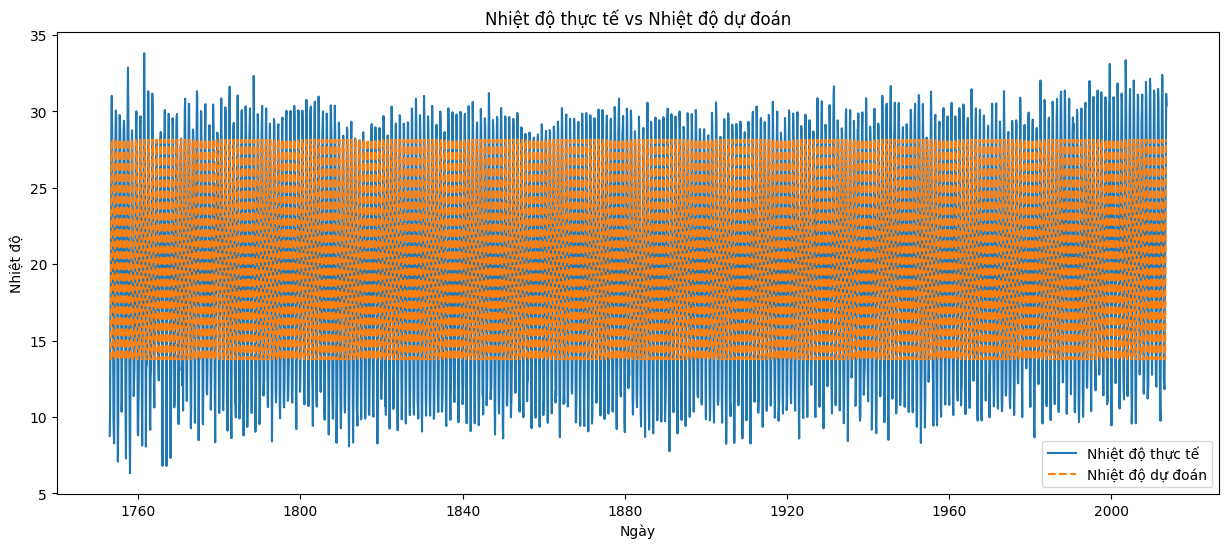

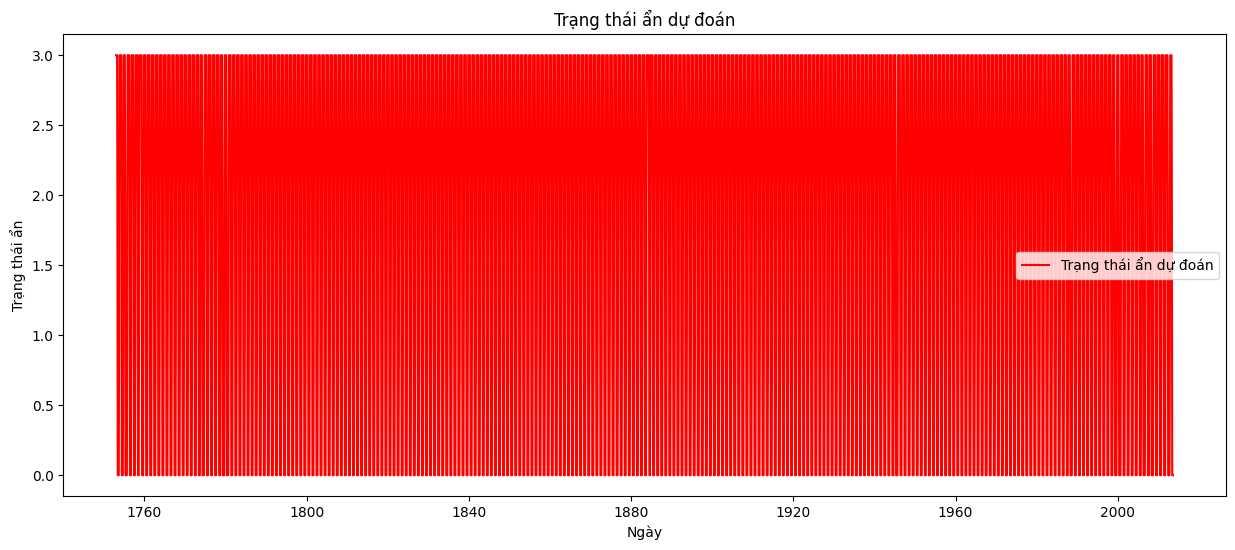

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Biến đổi ngược nhiệt độ dự đoán về thang đo gốc
X_pred = model.means_[hidden_states]
X_pred_orig_scale = scaler.inverse_transform(X_pred)

# Tính toán MAE và RMSE
X_true_orig_scale = df['AverageTemperature'].values
mae = mean_absolute_error(X_true_orig_scale, X_pred_orig_scale)
rmse = np.sqrt(mean_squared_error(X_true_orig_scale, X_pred_orig_scale))

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

# Vẽ biểu đồ nhiệt độ thực tế và dự đoán
plt.figure(figsize=(15, 6))
plt.plot(df.index, df['AverageTemperature'], label='Nhiệt độ thực tế')
plt.plot(df.index, X_pred_orig_scale, label='Nhiệt độ dự đoán', linestyle='dashed')
plt.title('Nhiệt độ thực tế vs Nhiệt độ dự đoán')
plt.xlabel('Ngày')
plt.ylabel('Nhiệt độ')
plt.legend()
plt.show()

# Vẽ biểu đồ các trạng thái ẩn dự đoán
plt.figure(figsize=(15, 6))
plt.plot(df.index, df['HiddenState'], label='Trạng thái ẩn dự đoán', color='r')
plt.title('Trạng thái ẩn dự đoán')
plt.xlabel('Ngày')
plt.ylabel('Trạng thái ẩn')
plt.legend()
plt.show()


In [22]:
df

,AverageTemperature,AverageTemperatureUncertainty,Country,years,month,season,HiddenState
dt,,,,,,,
1753-01-01,8.754,5.363,Tunisia,1753,1,winter,2
1753-02-01,10.597,3.183,Tunisia,1753,2,winter,2
1753-03-01,16.105,2.805,Tunisia,1753,3,spring,2
1753-04-01,18.181,5.257,Tunisia,1753,4,spring,0
1753-05-01,23.571,2.230,Tunisia,1753,5,spring,3
...,...,...,...,...,...,...,...
2013-04-01,20.383,0.746,Tunisia,2013,4,spring,3
2013-05-01,24.268,0.336,Tunisia,2013,5,spring,1
2013-06-01,27.488,0.947,Tunisia,2013,6,summer,1


### (Mixture of LDS)

/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:274: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


Mean Absolute Error (MAE): 1.8815651944744547
Root Mean Squared Error (RMSE): 2.247131880037002


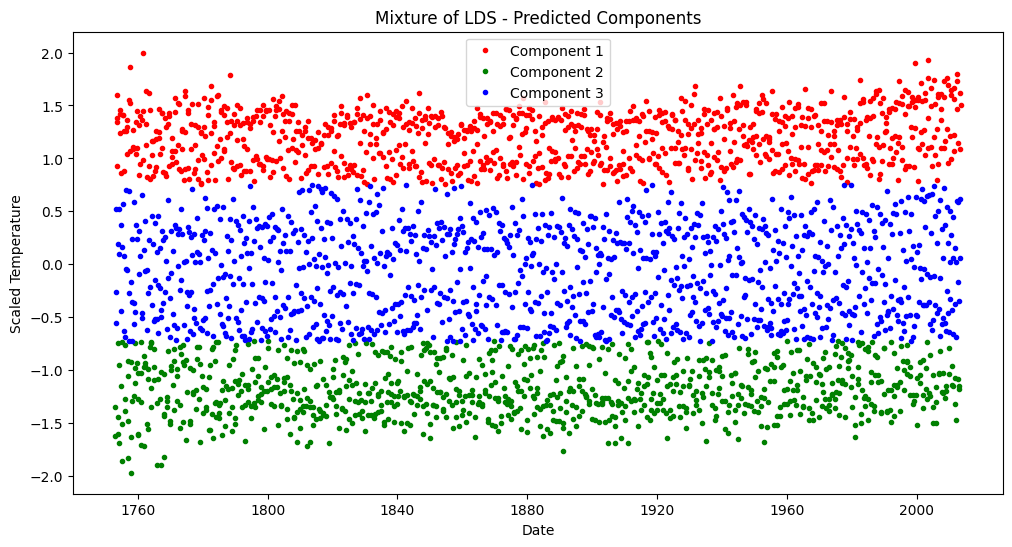

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import BayesianGaussianMixture
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file CSV
df = pd.read_csv('temp_Tunisia_new.csv')

# Chuyển đổi cột 'dt' thành định dạng datetime và sắp xếp theo thời gian
df['dt'] = pd.to_datetime(df['dt'])
df = df.set_index('dt')

# Sử dụng cột AverageTemperature làm dữ liệu đầu vào
X = df[['AverageTemperature']].values

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Xác định số thành phần của mô hình Mixture of LDS
n_components = 3

# Xây dựng và huấn luyện mô hình Mixture of LDS
model = BayesianGaussianMixture(n_components=n_components, random_state=0)
model.fit(X_scaled)

# Dự đoán nhãn của dữ liệu
labels = model.predict(X_scaled)

# Dự đoán giá trị trung bình từ các thành phần của mô hình
predicted_means = model.means_[labels]

# Chuyển đổi ngược kết quả dự đoán từ chuẩn hóa
predicted_values = scaler.inverse_transform(predicted_means)

# Tính toán MAE và RMSE
mae = mean_absolute_error(df['AverageTemperature'], predicted_values)
rmse = mean_squared_error(df['AverageTemperature'], predicted_values, squared=False)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Trực quan hóa kết quả
plt.figure(figsize=(12, 6))
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

for i in range(n_components):
    # Lấy các điểm dữ liệu thuộc thành phần i
    component_data = X_scaled[labels == i]
    component_dates = df.index[labels == i]
    plt.plot(component_dates, component_data[:, 0], '.', color=colors[i % len(colors)], label=f'Component {i+1}')

plt.title('Mixture of LDS - Predicted Components')
plt.xlabel('Date')
plt.ylabel('Scaled Temperature')
plt.legend()
plt.show()


In [ ]:
import numpy as np

# Số lượng mẫu và số lượng biến
n_samples, n_features = X_scaled.shape

# Log likelihood của mô hình
log_likelihood = model.score(X_scaled)

# Số lượng tham số của mô hình
n_parameters = (n_components - 1) + n_components * (n_features + n_features * (n_features + 1) // 2)

# AIC và BIC
aic = -2 * log_likelihood + 2 * n_parameters
bic = -2 * log_likelihood + n_parameters * np.log(n_samples)

print(f"Log Likelihood: {log_likelihood}")
print(f"AIC: {aic}")
print(f"BIC: {bic}")


Log Likelihood: -1.2197917336552508
AIC: 18.439583467310502
BIC: 66.82477628063211


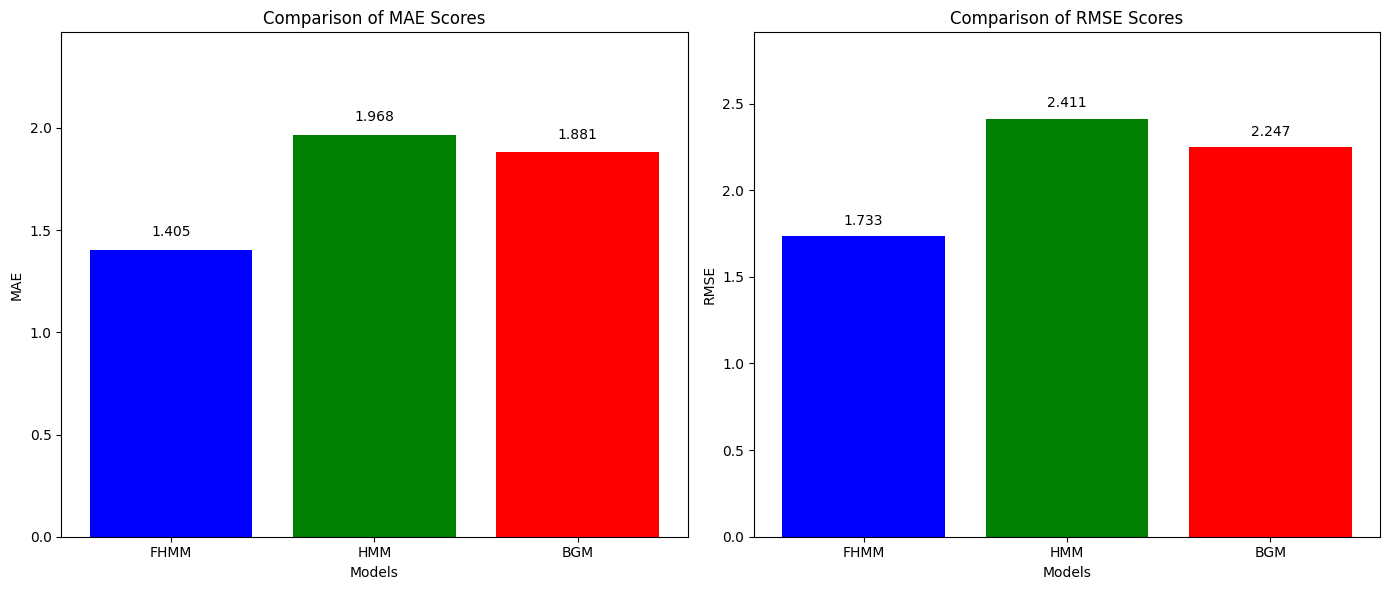

In [1]:
import matplotlib.pyplot as plt

# Dữ liệu đầu vào
models = ['FHMM', 'HMM', 'BGM']
mae_scores = [1.405, 1.968, 1.881]
rmse_scores = [1.733, 2.411, 2.247]

# Thiết lập kích thước biểu đồ
plt.figure(figsize=(14, 6))

# Biểu đồ MAE
plt.subplot(1, 2, 1)
plt.bar(models, mae_scores, color=['blue', 'green', 'red'])
plt.title('Comparison of MAE Scores')
plt.xlabel('Models')
plt.ylabel('MAE')
plt.ylim([0, max(mae_scores) + 0.5])
for i, v in enumerate(mae_scores):
    plt.text(i, v + 0.05, f'{v:.3f}', ha='center', va='bottom')

# Biểu đồ RMSE
plt.subplot(1, 2, 2)
plt.bar(models, rmse_scores, color=['blue', 'green', 'red'])
plt.title('Comparison of RMSE Scores')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.ylim([0, max(rmse_scores) + 0.5])
for i, v in enumerate(rmse_scores):
    plt.text(i, v + 0.05, f'{v:.3f}', ha='center', va='bottom')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()
